In [10]:
import numpy as np
import matplotlib.pyplot as plt

In [18]:
highpass_sin = np.loadtxt('highpass_sin.csv')
lowpass_sin = np.loadtxt('lowpass_sin.csv')
tank_sin = np.loadtxt('tank_sin.csv')

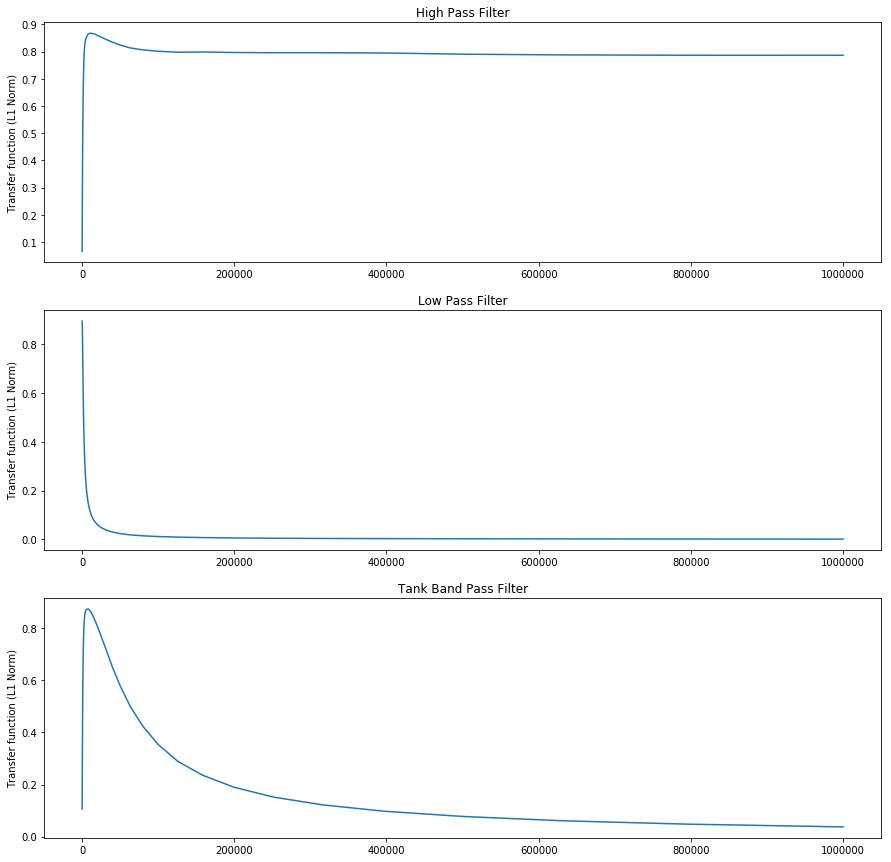

In [27]:
amps_hp_sin = highpass_sin[:, 1]
freqs_hp_sin = highpass_sin[:, 0]

amps_lp_sin = lowpass_sin[:, 1]
freqs_lp_sin = lowpass_sin[:, 0]

amps_tank_sin = tank_sin[:, 1]
freqs_tank_sin = tank_sin[:, 0]

plt.figure(figsize=(15,15)) 

plt.subplot(3, 1, 1)
plt.title('High Pass Filter')
plt.ylabel('Transfer function (L1 Norm)')
plt.plot(freqs_hp_sin, amps_hp_sin)

plt.subplot(3, 1, 2)
plt.title('Low Pass Filter')
plt.ylabel('Transfer function (L1 Norm)')
plt.plot(freqs_lp_sin, amps_lp_sin)

plt.subplot(3, 1, 3)
plt.title('Tank Band Pass Filter')
plt.ylabel('Transfer function (L1 Norm)')
plt.plot(freqs_tank_sin, amps_tank_sin)

plt.show()

In [65]:
lowpass_deformed = np.loadtxt('lowpass_deformed_clean.csv', delimiter=',')
lowpass_harmonic = np.loadtxt('lowpass_harmonic.csv')
square_wave = np.loadtxt('square_wave_clean.csv', delimiter=',')

#print(lowpass_harmonic)

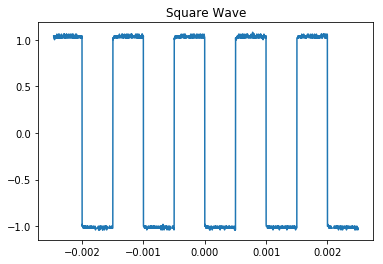

In [50]:
plt.figure()

plt.title('Square Wave')
plt.plot(square_wave[:,0], square_wave[:,1])

plt.show()

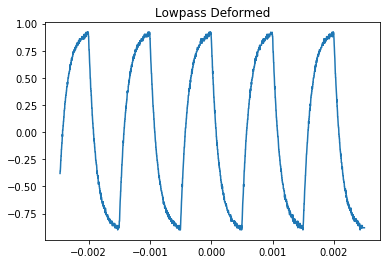

In [51]:
plt.figure()

plt.title('Lowpass Deformed')
plt.plot(lowpass_deformed[:, 0], lowpass_deformed[:, 1])

plt.show()

The Fourier series for a square wave is given by

$$
sq(t) = \frac{4}{\pi}\sum_{\text{$k=1$, $k$ odd}}^\infty \frac{\sin(2\pi k f t)}{k} = \frac{4}{\pi} \left( \sin(2\pi f t) + (1/3) \sin(2\pi 3 f t) + (1/5)\sin(2\pi 5 ft) + \ldots\right)
$$

We check that this works.

In [63]:
f = 1

t = np.linspace(0,2,201) #two cycles, 100 points each

y1 = (4/np.pi)*np.sin(2*np.pi*f*t)
y3 = y1 + (4/(3*np.pi))*np.sin(2*np.pi*3*f*t)
y5 = y3 + (4/(5*np.pi))*np.sin(2*np.pi*5*f*t)

sqwave = np.sign(np.sin(2*np.pi*f*t)) #an actual square wave

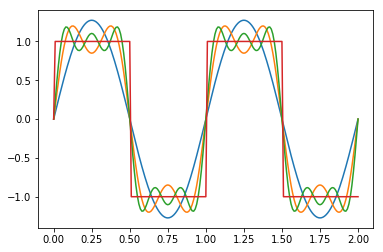

In [64]:
plt.figure()
plt.plot(t,y1, t,y3, t,y5, t, sqwave)
plt.show()

In [97]:
print(lowpass_harmonic)

[[ 1.000000e+03  6.916752e-01 -3.901698e+01]
 [ 2.000000e+03  4.630443e-01 -5.810412e+01]
 [ 3.000000e+03  3.346817e-01 -7.056493e+01]
 [ 4.000000e+03  2.596710e-01 -7.697031e+01]
 [ 5.000000e+03  2.116965e-01 -8.080109e+01]
 [ 6.000000e+03  1.781181e-01 -8.425645e+01]
 [ 7.000000e+03  1.550196e-01 -8.307996e+01]
 [ 8.000000e+03  1.364694e-01 -8.476899e+01]
 [ 9.000000e+03  1.208983e-01 -8.655511e+01]
 [ 1.000000e+04  1.090524e-01 -8.795503e+01]
 [ 1.100000e+04  9.932596e-02 -8.875814e+01]
 [ 1.200000e+04  9.134263e-02 -8.953727e+01]
 [ 1.300000e+04  8.661941e-02  8.980640e+01]
 [ 1.400000e+04  8.139208e-02 -8.843297e+01]
 [ 1.500000e+04  7.314973e-02 -8.903134e+01]
 [ 1.600000e+04  6.873241e-02 -8.942706e+01]
 [ 1.700000e+04  6.505660e-02 -8.996464e+01]
 [ 1.800000e+04  6.152625e-02  8.975073e+01]
 [ 1.900000e+04  5.855786e-02  8.899215e+01]
 [ 2.000000e+04  5.603516e-02  8.866324e+01]
 [ 2.100000e+04  5.334955e-02  8.814617e+01]
 [ 2.200000e+04  5.084224e-02  8.825219e+01]
 [ 2.30000

In [155]:
t = np.linspace(0,2,2005)

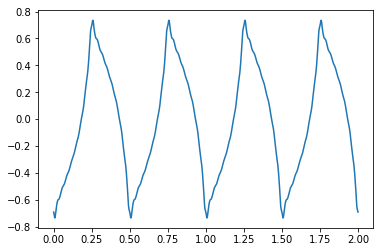

In [164]:
f = 1000 # 1 khz sq wave

sq = np.zeros(len(t)) #preallocate the output array
for h in np.arange(1,40,2):
    sq += lowpass_harmonic[h][1] * (4/(np.pi*h))*np.sin(2*np.pi*f*h*t + (lowpass_harmonic[h][2] * np.pi / 180))

plt.figure()
plt.plot(t,sq)
plt.show()